# Murugiah_NavinKarthik_Midterm_Linear

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

### Import Dataset

In [3]:
df=pd.read_csv('mpg.csv')

### Data Understanding

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
#Since horsepower contains the character '?', finding out the number of columns with horsepower=?
df[df['horsepower']=='?']
#6 rows contain the '?' in place of horsepower, dropping those 6 rows from the data
df=df[df['horsepower']!='?']
#Converting horsepower to int
df.horsepower=df.horsepower.astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [9]:
df.shape

(392, 9)

In [10]:
#Trying to find if the data has missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### Visualizations

Text(0.5,1,'Distribution plot of Miles per Gallon')

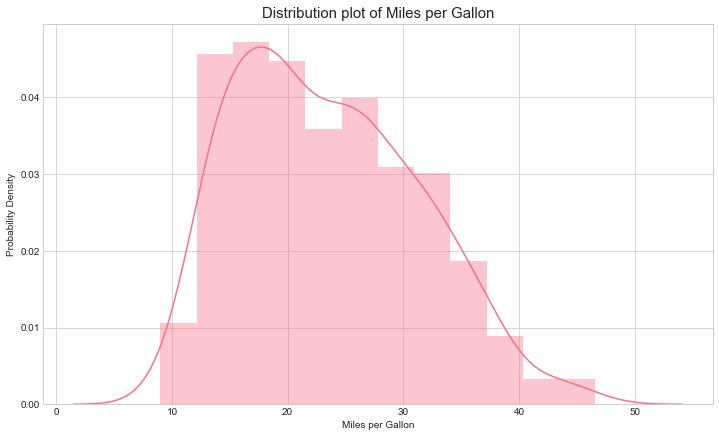

In [11]:
#Checking for normality of the dependent variable mpg
sns.set_palette("husl")
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.distplot(df['mpg'])
plt.xlabel('Miles per Gallon')
plt.ylabel('Probability Density')
plt.title('Distribution plot of Miles per Gallon',fontsize=15)

*** The data is approximately normal, hence there should no problem in model building ***

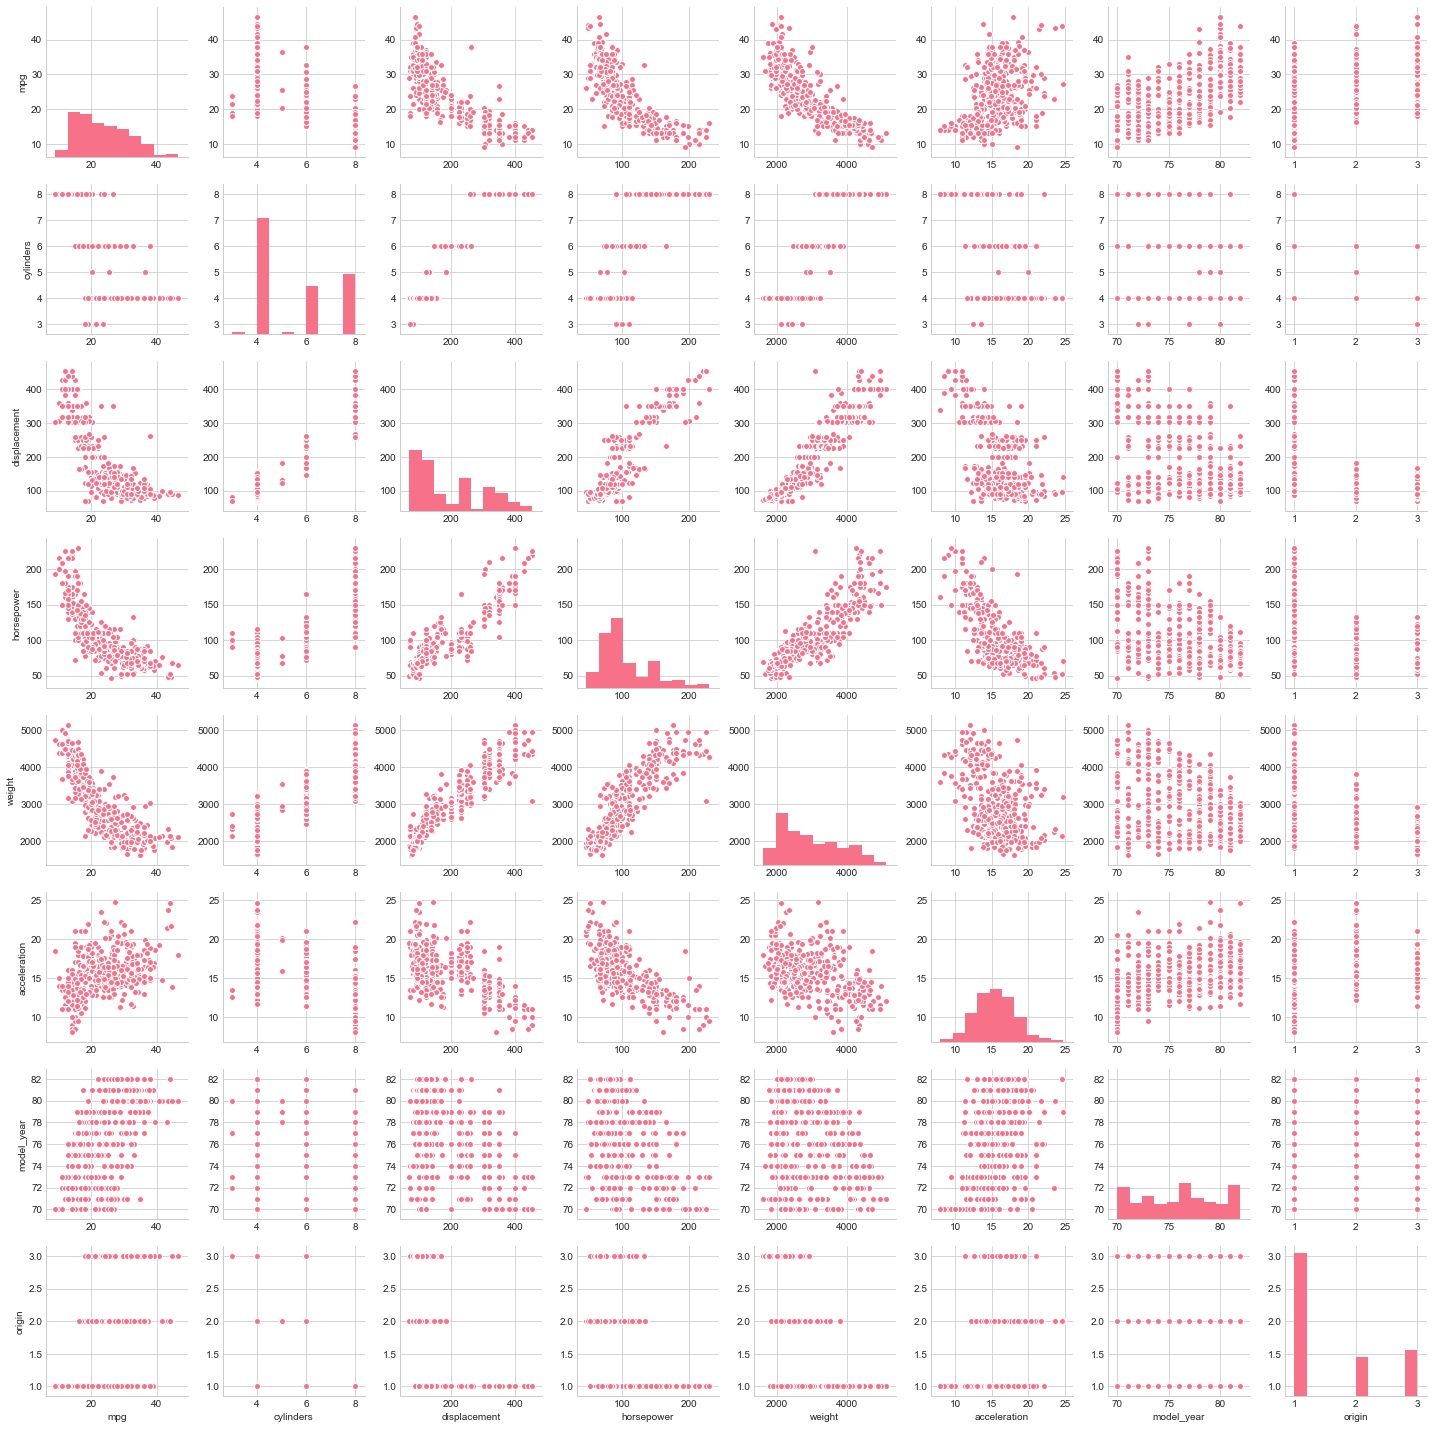

In [12]:
#Checking for correlations between X's and Y and between X's
sns.pairplot(df)

Observations from the correlation pair-plot 
1. As the number of cylinder increase, the mpg decreases
2. As the displacement increases, the mpg decreases
3. As the weight increases, the mpg decreases
4. As the acceleration increases, the mpg increases
5. As horsepower increases, the mpg decreases
5. The latest cars have higher mpg than older cars 

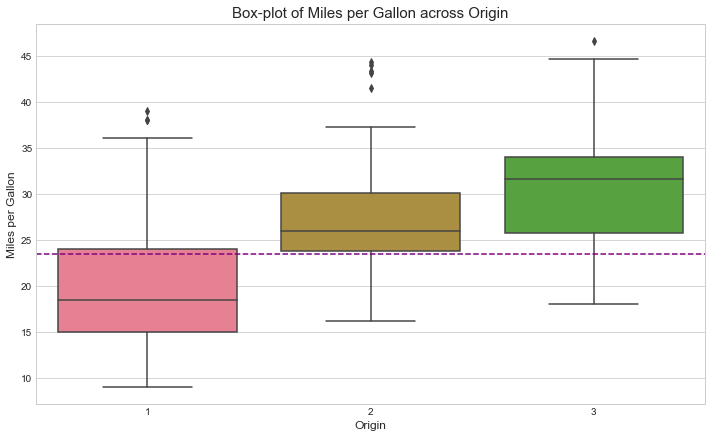

In [13]:
#Boxplot of mpg across origin
plt.figure(figsize=(12,7))
sns.boxplot(x=df['origin'],y=df['mpg'],data=df)
plt.title('Box-plot of Miles per Gallon across Origin',fontsize=15)
plt.xlabel('Origin',fontsize=12)
plt.ylabel('Miles per Gallon',fontsize=12)
plt.axhline(df['mpg'].mean(),linestyle='dashed',color='purple')

*** It can be seen that the cars manufactured in the country 3 has the highest mileage, followed by 2 and 1. ***

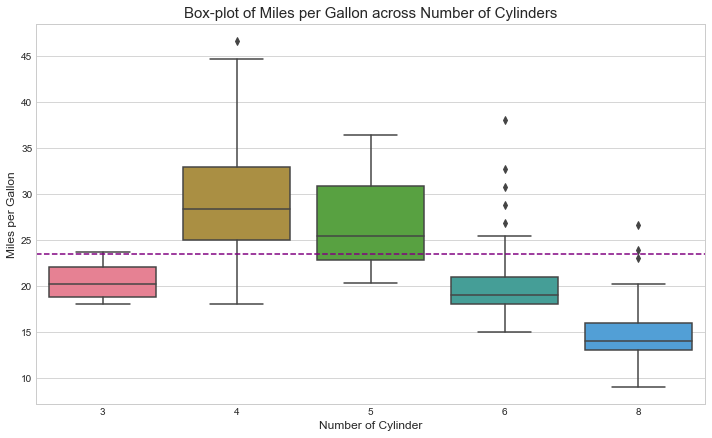

In [14]:
#Boxplot of mpg across Number of Cylinders
plt.figure(figsize=(12,7))
sns.boxplot(x=df['cylinders'],y=df['mpg'],data=df)
plt.title('Box-plot of Miles per Gallon across Number of Cylinders',fontsize=15)
plt.xlabel('Number of Cylinder',fontsize=12)
plt.ylabel('Miles per Gallon',fontsize=12)
plt.axhline(df['mpg'].mean(),linestyle='dashed',color='purple')

*** As the number of cylinders increase, the mileage of the car decreases ***

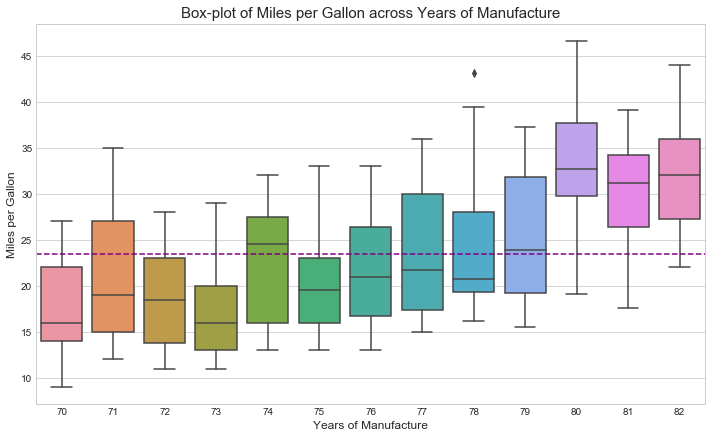

In [15]:
#Boxplot of mpg across Years of Manufacture
plt.figure(figsize=(12,7))
sns.boxplot(x=df['model_year'],y=df['mpg'],data=df)
plt.title('Box-plot of Miles per Gallon across Years of Manufacture',fontsize=15)
plt.xlabel('Years of Manufacture',fontsize=12)
plt.ylabel('Miles per Gallon',fontsize=12)
plt.axhline(df['mpg'].mean(),linestyle='dashed',color='purple')

*** Over the years, the manufacturers have made use of technological advancements to considerably increase the mileage of the cars ***

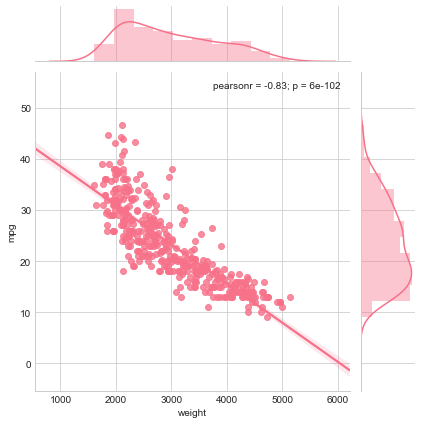

In [16]:
# Studying the correlation between Weight and Miles per Gallon
sns.jointplot(x=df['weight'],y=df['mpg'],data=df,kind='reg')

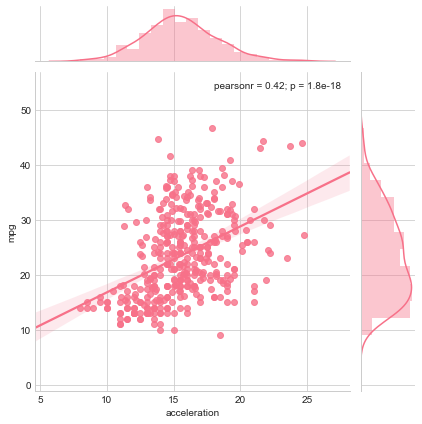

In [17]:
# Studying the correlation between Acceleration and Miles per Gallon
sns.jointplot(x=df['acceleration'],y=df['mpg'],data=df,kind='reg')

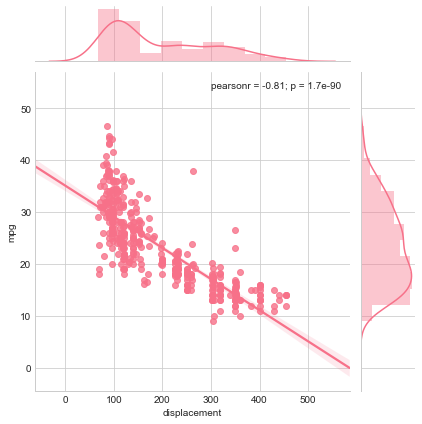

In [18]:
# Studying the correlation between Acceleration and Miles per Gallon
sns.jointplot(x=df['displacement'],y=df['mpg'],data=df,kind='reg')

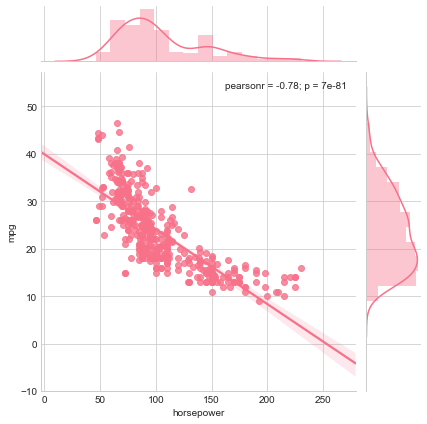

In [19]:
# Studying the correlation between Horsepower and Miles per Gallon
sns.jointplot(x=df['horsepower'],y=df['mpg'],data=df,kind='reg')

### Test Train split

In [20]:
#Defining dependent and independent variables
y=df['mpg']
X=df.drop(['mpg','name'],axis=1)

In [21]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=100)

### Linear Regression 

#### Modeling with all independent variables

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [23]:
#Training the model
lr1=lr.fit(X_train,y_train)

In [24]:
#Printing the coefficients of the model
print('Coefficients: \n', lr1.coef_)

Coefficients: 
 [-0.4751983   0.02618128 -0.03441278 -0.00633114  0.14672061  0.7341243
  1.68259283]


In [25]:
#Predicting for Test data
predictions=lr1.predict(X_test)

In [26]:
#R-squared value
lr1_score=lr1.score(X_test,y_test)
#Intercept
lr1_intercept=lr1.intercept_

Text(0,0.5,'Predicted Y')

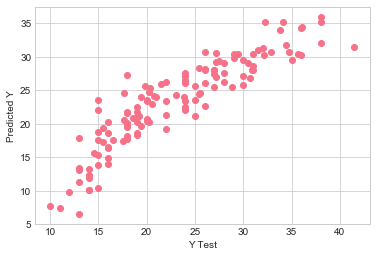

In [27]:
#Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [28]:
#Evaluating the Model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', lr1_score)
print('Intercept', lr1.intercept_)

MAE: 2.47003267769
MSE: 9.84296929788
RMSE: 3.13735068137
R-squared: 0.805093242986
Intercept -17.1880224225


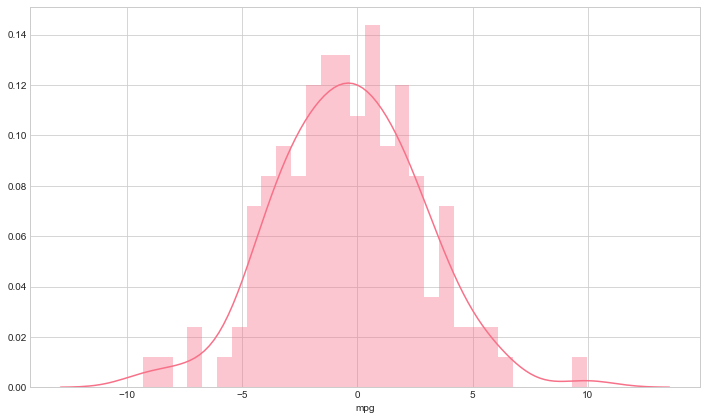

In [29]:
#Residual plot
plt.figure(figsize=(12,7))
sns.distplot((y_test-predictions),bins=30);

In [30]:
#Coefficients
coeffecients = pd.DataFrame(lr1.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
cylinders,-0.475198
displacement,0.026181
horsepower,-0.034413
weight,-0.006331
acceleration,0.146721
model_year,0.734124
origin,1.682593


### Interpretations:
1. For every one unint increase in the cylinder, the mpg decreases by 0.475, controlling for all other indepedent variables
2. For every one unint increase in the displacement, the mpg increases by 0.026, controlling for all other indepedent variables
3. For every one unint increase in the horsepower, the mpg decreases by 0.034, controlling for all other indepedent variables
4. For every one unint increase in the weight, the mpg decreases by 0.006, controlling for all other indepedent variables
5. For every one unint increase in the acceleration, the mpg increases by 0.146, controlling for all other indepedent variables
6. For every one unint increase in the model year, the mpg increases by 0.073, controlling for all other indepedent variables
7. For every one unint increase in the origin, the mpg increases by 1.68, controlling for all other indepedent variables

## One of the problems with the above model is that a lot of indepedent variables are highly collinear. Hence, a linear model should be created by dropping highly collinear variables. After a number of trial and error approaches, only year of manufacture and weight are used as independent variables.

# Linear Model 2

### Test Train split

In [31]:
#Defining dependent and independent variables
y=df['mpg']
X=df[['weight','model_year']]

In [32]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=100)

### Linear Regression 

#### Modeling with all independent variables

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [34]:
#Training the model
lr1=lr.fit(X_train,y_train)

In [35]:
#Printing the coefficients of the model
print('Coefficients: \n', lr1.coef_)

Coefficients: 
 [-0.00665125  0.77912041]


In [36]:
#Predicting for Test data
predictions=lr1.predict(X_test)

In [37]:
#R-squared value
lr1_score=lr1.score(X_test,y_test)
#Intercept
lr1_intercept=lr1.intercept_

Text(0,0.5,'Predicted Y')

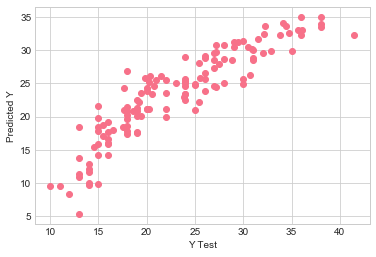

In [38]:
#Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [39]:
#Evaluating the Model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', lr1_score)
print('Intercept', lr1.intercept_)

MAE: 2.41195629436
MSE: 9.19168208388
RMSE: 3.03177869969
R-squared: 0.817989786186
Intercept -15.8329787212


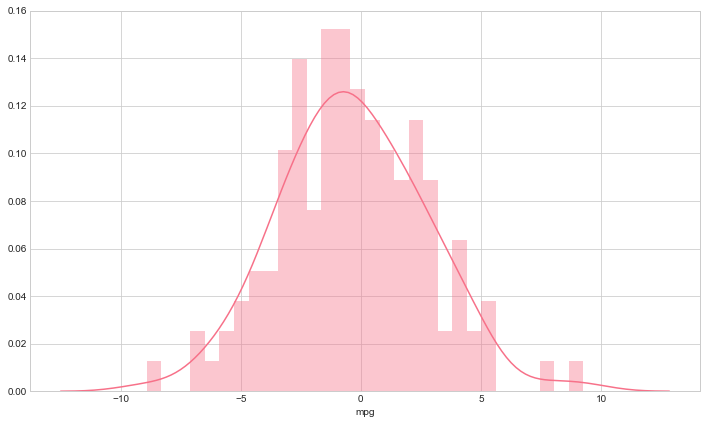

In [40]:
#Residual plot
plt.figure(figsize=(12,7))
sns.distplot((y_test-predictions),bins=30);

In [41]:
#Coefficients
coeffecients = pd.DataFrame(lr1.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
weight,-0.006651
model_year,0.779120


### Interpretations:
1. For every one unit increase in the weight, the mpg decreases by 0.006, controlling for all other indepedent variables
2. For every one unint increase in the model year, the mpg increases by 0.779, controlling for all other indepedent variables